# Perceptron: Linear Classifier

Perceptron is based on the 1943 model of neurons made by McCulloch and Pitts and by Hebb and it was developed by Rosenblatt in 1962. 

Linear separability is pre-condition for using this algorithm. If the given dataset is not linearly separable, then using perceptron algorithm will not give us result we want. This is Perceptron Algorithm:


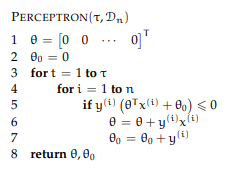

Picture below shows how this model makes predictions. When we get value greater than 0, it means this observation belongs to positive class, otherwise, to negative class.

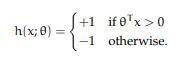

In the Perceptron function we are trying to find thetas that will classify our datapoints correctly, and if statement inside for loop is for updating our thetas. Explanation:

$y^{(i)} $ is the actual label for $i^{th}$ observation

$\theta^Tx^{(i)}+\theta_0$ is the predicted class for $i^{th}$ observation

When model classifies $i^{th}$ observation correctly, this expression will give us positive value and there will be no update in thetas. But if prediction is wrong, then thetas will be updated.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#our data
data = np.array([[10,5,6,3,4,7,7,6,4,5],[25,7,15,2,14,6,16,5,6,17],[1,-1,1,-1,1,-1,1,-1,-1,1]]).T
data

array([[10, 25,  1],
       [ 5,  7, -1],
       [ 6, 15,  1],
       [ 3,  2, -1],
       [ 4, 14,  1],
       [ 7,  6, -1],
       [ 7, 16,  1],
       [ 6,  5, -1],
       [ 4,  6, -1],
       [ 5, 17,  1]])

In [3]:
#X variables
X = data[:,:-1]
X

array([[10, 25],
       [ 5,  7],
       [ 6, 15],
       [ 3,  2],
       [ 4, 14],
       [ 7,  6],
       [ 7, 16],
       [ 6,  5],
       [ 4,  6],
       [ 5, 17]])

In [4]:
#labels
y = data[:,-1]
y

array([ 1, -1,  1, -1,  1, -1,  1, -1, -1,  1])

In [5]:
def perceptron(data, T=1):
    '''
     Parameters
     ----------
     data : ndarray
        Dataset with X variables and labels
     T : int
        Number of iterations. Default is 1
        
     Returns
     -----------
     theta : ndarray
         last recorded theta
     theta_0 : ndarray
         last recorded theta 0
     recorded : list of ndarray-s
         all values that thetas and theta 0 have got
    '''
    n,d = data[:,:-1].shape
    X = data[:,:-1]
    y = data[:,-1]
    theta = np.zeros(shape=(d,1)).flatten()
    theta_0 = np.array([0])
    false_pred=0
    recorded = []
    for t in range(T):
        for i in range(n):
            a = theta.T@X[i]+theta_0
            if y[i]*a <= 0:
                theta=theta+X[i]*y[i]
                theta_0=theta_0+y[i]
                recorded.append((theta,theta_0))
                
            #Break loop if all observations predicted correctly
            if no_wrong_pred(theta,theta_0):
                break
                
    return theta,theta_0, recorded
            

<b>Note: </b> I will use thetas in 'recorded' to show progress of our algorithm

In [6]:
def no_wrong_pred(theta,theta_0):
    '''
     Returns True if there is not any wrong prediction.
    '''
    wrong_pred=0
    pred = theta.T@X.T+theta_0
    for i in range(X.shape[0]):
        if pred[i] > 0:
            pred[i]=1
        else:
            pred[i]=-1
        for i in range(X.shape[0]):
            if pred[i]!=y[i]:
                wrong_pred += 1
    if wrong_pred==0:
        return True

We used $\theta^{T}X+\theta_0$ for making predictions. Then the equation for linear separator is $\theta^{T}X+\theta_0=0$. To make it simple we can rewrite it also as: $w_1x+w_2y+b=0$

Then:

$w_2y = -w_1x-b$

$y = (-w_1/w_2)x - b/w_2$

Now we can visualize our linear separator.

In [7]:
def plot(data,recorded,i):
    '''
     Plots data and linear separator
     
     Parameters
     ----------
     data : ndarray
        Dataset with X variables and labels
     recorded : list of ndarray-s
        all values that thetas and theta 0 have got
     i : int
        index of thetas and theta 0-s in 'recorded' 
    '''
    w1 = recorded[i][0][0]
    w2 = recorded[i][0][1]
    b = recorded[i][1][0]
    sns.scatterplot(x= X[:,0],y=X[:,1],hue=y, palette=['blue','red'])
    sns.lineplot(np.arange(np.max(X.shape[0])+4), (-w1/w2)*np.arange(np.max(X.shape[0])+4)-b/w2 ,color='orange')

In [8]:
theta,theta_0, recorded = perceptron(data,T=15)

In [9]:
# Optimal thetas
theta, theta_0

(array([-28.,  14.]), array([-8]))

In [10]:
# Number of all thetas recorded till finding optimal one
len(recorded)

16

#### Plotting progress of our Linear Classification Algorithm - Perceptron

In [ ]:
sns.set_style('darkgrid')
for i in range(len(recorded)):
    plt.figure(i)
    plot(data,recorded,i)